In [15]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

import sys
sys.path.append("../../")  # 或者 append 到你的 mamba_mod 根路径

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

import scienceplots
plt.style.use(['science', 'no-latex', 'light'])

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,420fe524-1de3-4eae-ab6c-e02145a4999c,gkr_gpt2_fast,Transformer-4L8H,,-1,-1,20,4,8,gkr_gpt2_fast_debug
1,01792bc8-29fb-4d6a-b590-537dcf997170,linear_regression,Transformer-12L8H,,-1,-1,20,12,8,linear_regression_standard


# Plot pre-computed metrics

In [16]:
run_path = os.path.join(run_dir, task, run_id)
print(f"Run path: {run_path}")


Run path: ../../models/g/420fe524-1de3-4eae-ab6c-e02145a4999c


In [9]:
print("Available models in metrics:", list(metrics["standard"].keys()))
print("Expected models:", models)


Available models in metrics: ['Transformer-4L8H', '3-Nearest Neighbors', 'Averaging']
Expected models: ['Transformer']



=== Processing task: gkr_gpt2_fast ===
Valid run path: ../models/gkr_gpt2_fast/420fe524-1de3-4eae-ab6c-e02145a4999c
gkr_gpt2_fast_debug 420fe524-1de3-4eae-ab6c-e02145a4999c


100%|██████████| 1/1 [00:00<00:00, 34379.54it/s]


<Figure size 2000x1200 with 0 Axes>

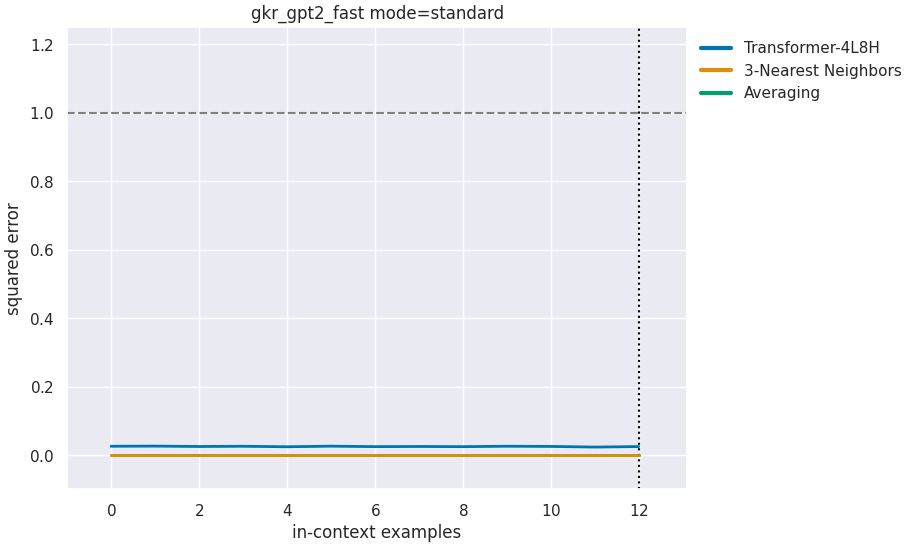


=== Processing task: linear_regression ===
Valid run path: ../models/linear_regression/01792bc8-29fb-4d6a-b590-537dcf997170
linear_regression_standard 01792bc8-29fb-4d6a-b590-537dcf997170


100%|██████████| 15/15 [00:00<00:00, 419430.40it/s]

[Warning] No model names found for task linear_regression


In [17]:
import os
import yaml
import torch
import matplotlib.pyplot as plt
from munch import Munch

run_base = "../models"
xlim = 200  # 你可以设置为 None

for task in os.listdir(run_base):
    task_path = os.path.join(run_base, task)
    if not os.path.isdir(task_path):
        continue

    print(f"\n=== Processing task: {task} ===")

    run_ids = []
    run_paths = []

    for run_id in os.listdir(task_path):
        run_path = os.path.join(task_path, run_id)
        config_path = os.path.join(run_path, "config.yaml")
        if os.path.exists(config_path):
            run_ids.append(run_id)
            run_paths.append(run_path)
            print("Valid run path:", run_path)

    if not run_paths:
        print(f"[Warning] No valid runs found under task {task}")
        continue

    def valid_row(r):
        return r.task == task and r.run_id in run_ids

    def rename_mamba(x, r):
        return x if 'mamba' not in x else 'Mamba'

    # 注意：df 是你之前 collect 出的所有 run 表，需定义或传入
    metrics = collect_results(run_base, df, valid_row=valid_row, rename_model=rename_mamba,
                              no_recompute=True, xlim=xlim)

    # 从第一个 run 中取维度和点数信息（默认所有 run 参数一致）
    _, conf = get_model_from_run(run_paths[0], only_conf=True)
    n_dims = conf.model.n_dims
    n_train_points = conf.training.curriculum.points.end

    models = relevant_model_names.get(task, []).copy()
    if not models:
        print(f"[Warning] No model names found for task {task}")
        continue

    # === 可视化 ===
    plt.figure(figsize=(20, 12))     
    basic_plot(metrics["standard"], models=models, title=f"{task} mode=standard", n_train_points=n_train_points,
               size_mult=2., size=(10, 6))
    plt.show()


In [18]:
metrics.keys()

dict_keys(['half_subspace', 'noisyLR', 'orthogonal_train_test', 'overlapping_train_test', 'random_quadrants', 'scale-x=0.333', 'scale-x=0.5', 'scale-x=2', 'scale-x=3', 'scale-y=0.333', 'scale-y=0.5', 'scale-y=2', 'scale-y=3', 'skewed', 'standard'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


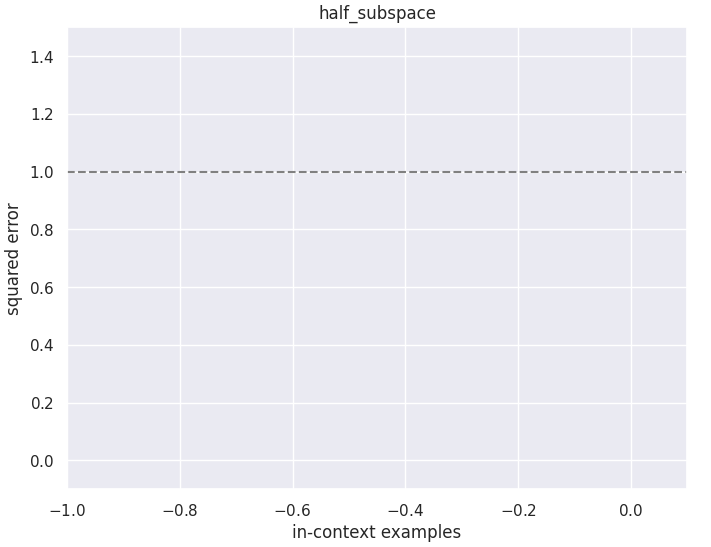

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


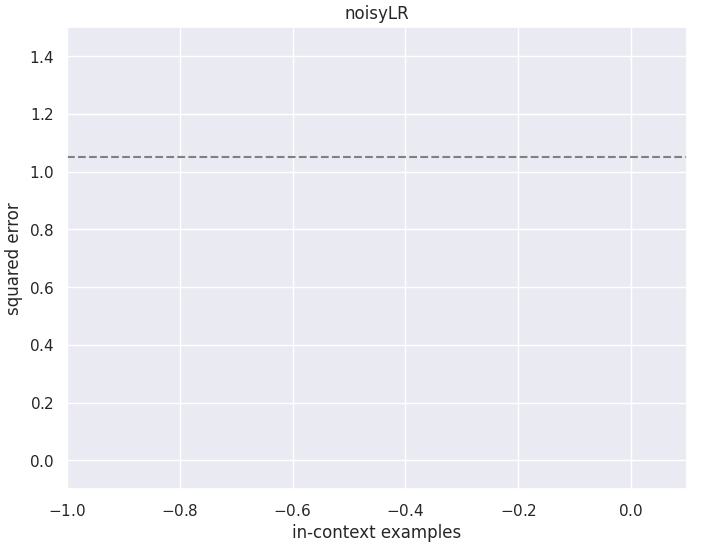

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


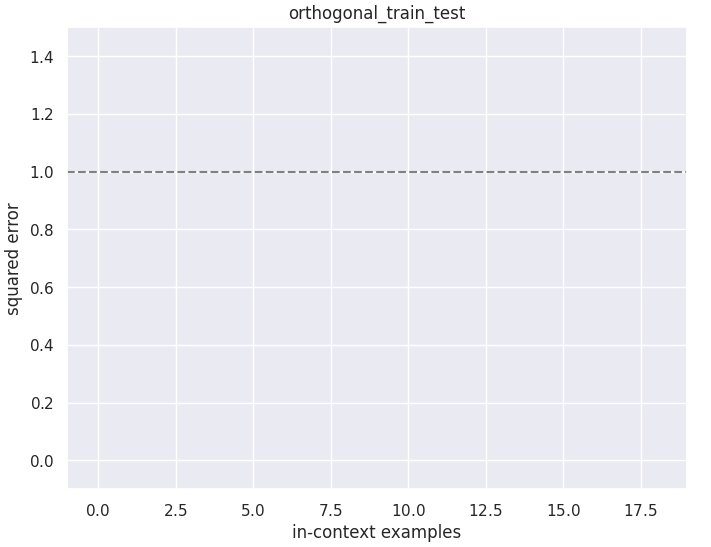

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


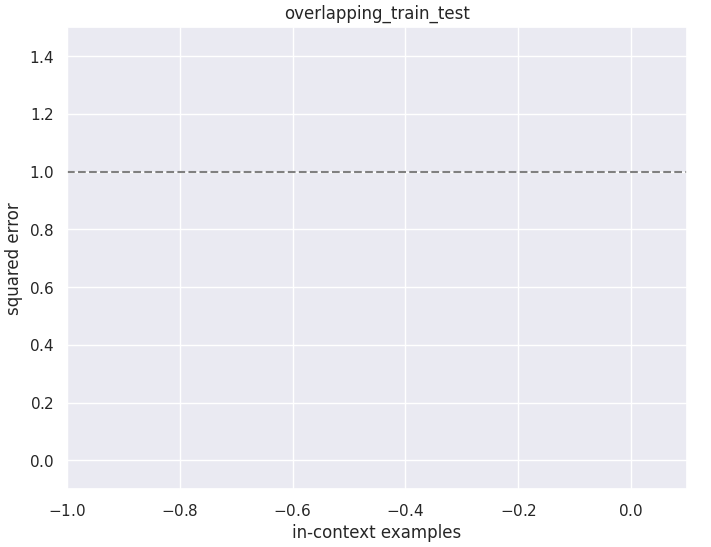

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


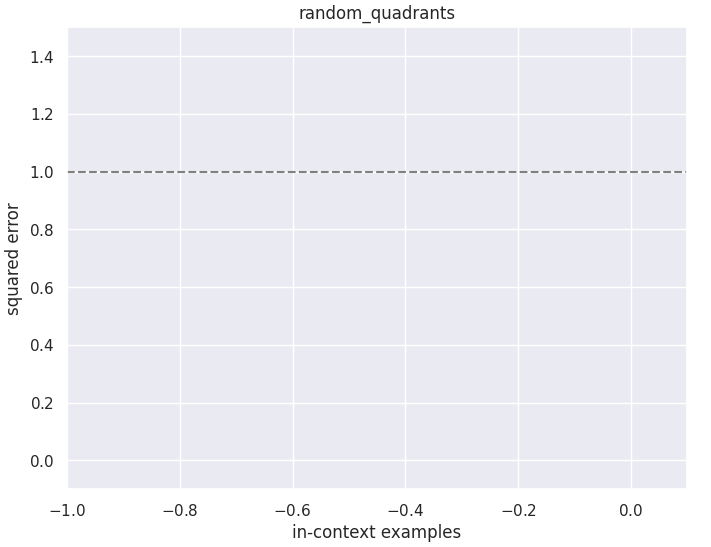

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


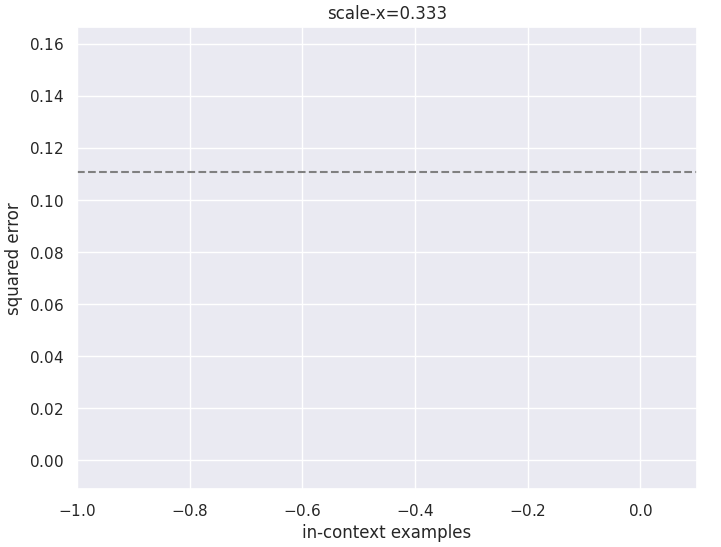

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


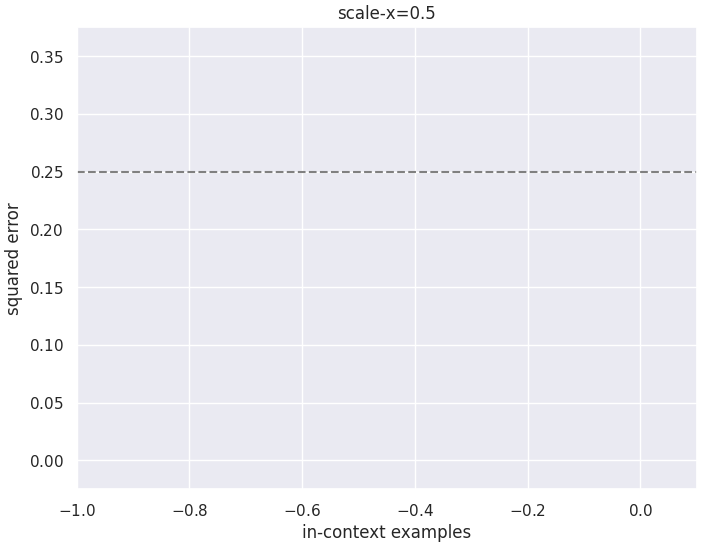

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


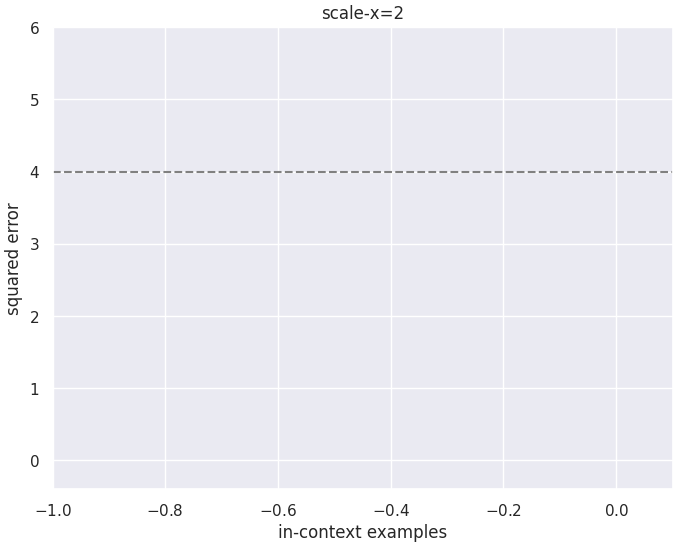

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


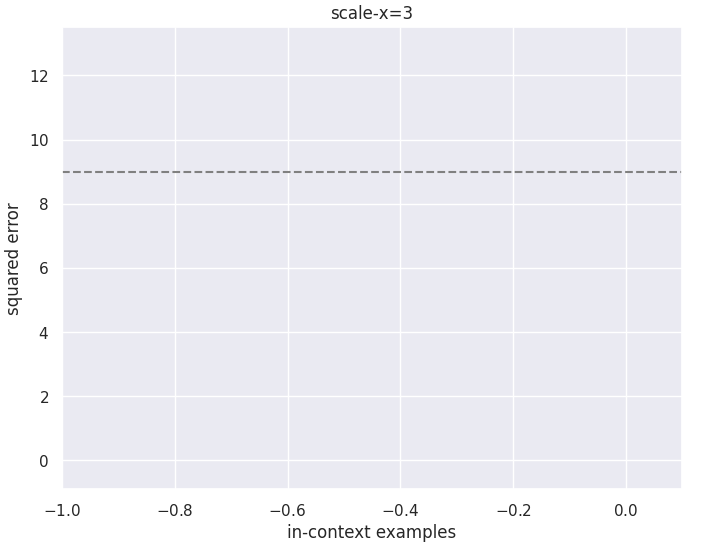

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


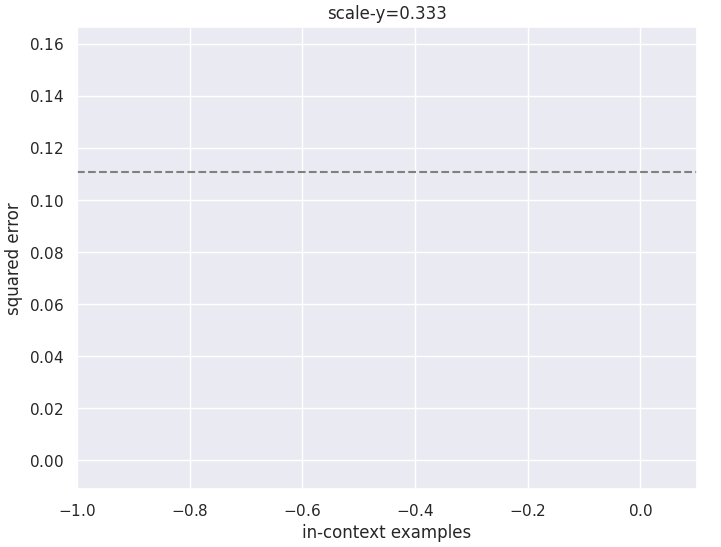

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


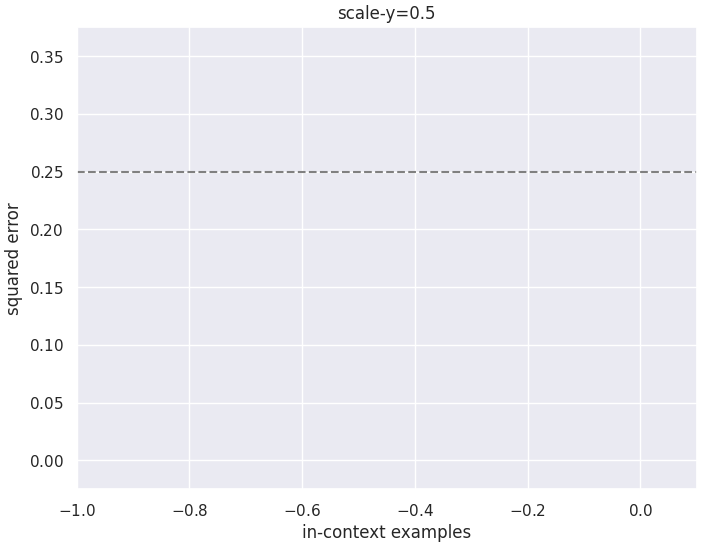

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


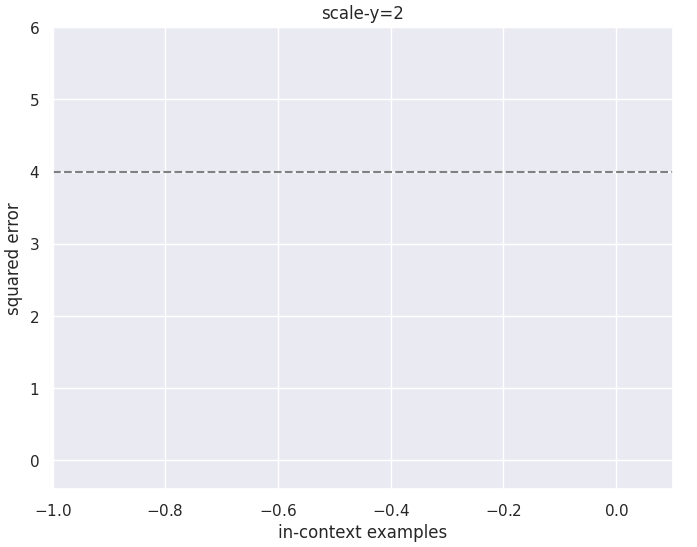

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


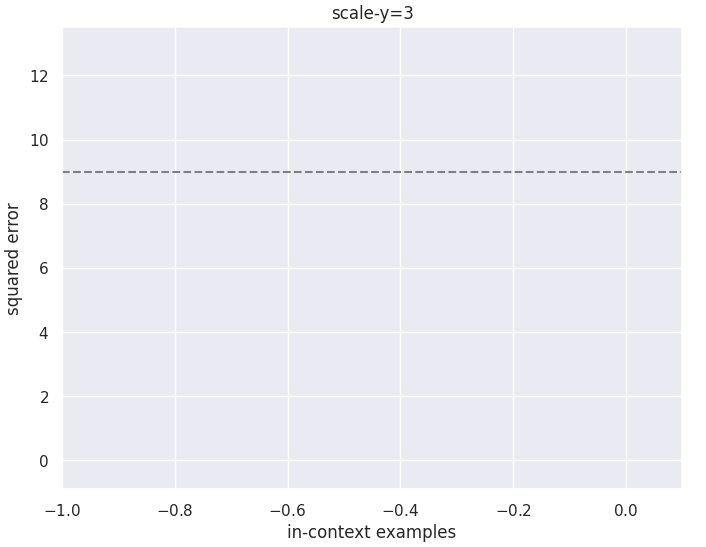

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


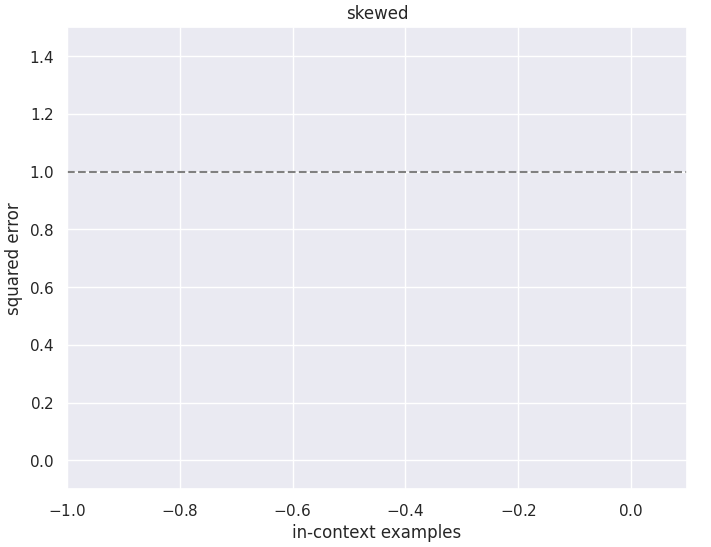

In [20]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale, size_mult=2., n_train_points=n_train_points, size=(10, 6))
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)
    # plt.savefig(f"../imgs/no_pos/out_of_dist/{name}.png")
    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [21]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [22]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [23]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [24]:
with torch.no_grad():
    pred = model(xs, ys)

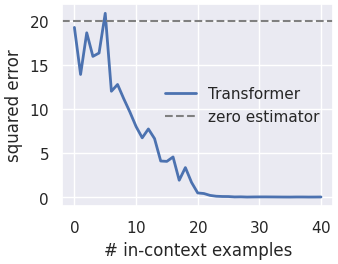

In [32]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
# plt.title(f"Task: {conf.training.task}, Model: {conf.model}")
plt.savefig(f"../imgs/Task: {conf.training.task}, Model: {conf.model}.png")
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [33]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

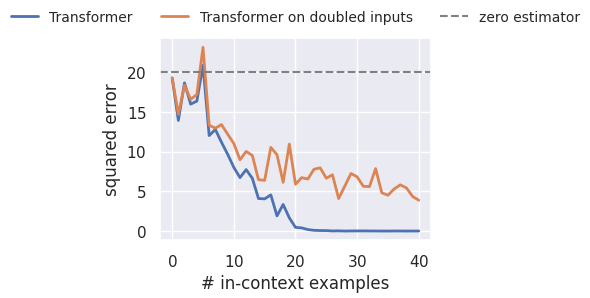

In [43]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=10)
plt.savefig(f"../imgs/Task: {conf.training.task}, Model: {conf.model} - doubled inputs.png")
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.